In [1]:
import torch 
import numpy as np
from matplotlib import pyplot as plt
import torch
import wandb
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.strategies.ddp import DDPStrategy
from pytorch_lightning.utilities import rank_zero_info
import gc
from pl_distill_tsp_model import TSPModel_distill

/usr0/home/junweih/miniconda3/envs/difusco/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = TSPModel_distill(
    task='tsp', 
    storage_path='',
    training_split='data/data/tsp/tsp50_train_concorde.txt',
    validation_split='data/tsp/tsp50_valid_concorde.txt',
    test_split='data/tsp/tsp50_test_concorde.txt',
)

Solving environment: - Solving environment: / / done
done

## Package Plan ##

  environment location: /usr0/home/junweih/miniconda3/envs/difusco

  added / updated specs:
    - _libgcc_mutex
    - _openmp_mutex
    - backcall
    - ca-certificates
    - certifi
    - decorator
    - entrypoints
    - ipykernel
    - ipython
    - ipython_genutils
    - jedi
    - jupyter_client
    - jupyter_core
    - ld_impl_linux-64
    - libffi
    - libgcc-ng
    - libgomp
    - libsodium
    - libstdcxx-ng
    - matplotlib-inline
    - ncurses
    - openssl
    - parso
    - pexpect
    - pickleshare
    - pip
    - prompt-toolkit
    - ptyprocess
    - pygments
    - python-dateutil
    - python=3.7
    - python_abi
    - pyzmq
    - readline
    - setuptools
    - six
    - sqlite
    - tk
    - tornado
    - traitlets
    - wcwidth
    - wheel
    - xz
    - zeromq
    - zlib


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certif

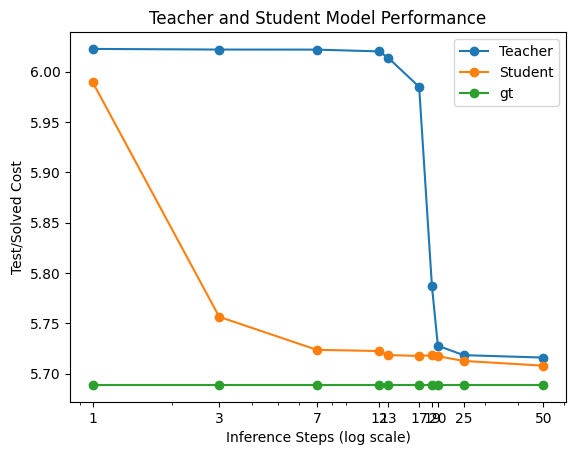

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for teacher and student model performance
test_solved_cost = [ 6.02269,5.98984,
                    6.022060646144379, 5.7565,
                    6.022, 5.72369,
                    6.02024, 5.7225,
                    6.0139, 5.71848,
                    5.98497, 5.71764,
                    5.78675,5.7183, 
                    5.72781, 5.717340424331282,
                    5.71841,5.71267, 
                    5.716, 5.707956937259032]
epochs = [1, 3, 7, 12,13, 17, 19, 20,25, 50]

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting teacher model performance
teacher_indices = [i for i in range(len(test_solved_cost)) if i  % 2 == 0]
teacher_epochs = [epochs[teacher_indices[i] // 2] for i in range(len(teacher_indices))]
teacher_performance = [test_solved_cost[i] for i in teacher_indices]
# for i in range(len(teacher_epochs)):
#     ax.text(teacher_epochs[i], teacher_performance[i], f'{teacher_performance[i]:.4f}', ha='center', va='bottom')
ax.plot(teacher_epochs, teacher_performance, marker='o', linestyle='-', label='Teacher')

# Plotting student model performance
student_indices = [i for i in range(len(test_solved_cost)) if i % 2 != 0]
student_epochs = [epochs[student_indices[i] // 2] for i in range(len(student_indices))]
student_performance = [test_solved_cost[i] for i in student_indices]
# for i in range(len(student_epochs)):
#     ax.text(student_epochs[i], student_performance[i], f'{student_performance[i]:.4f}', ha='center', va='bottom')
ax.plot(student_epochs, student_performance, marker='o', linestyle='-', label='Student')

gt_epochs = [1, 3, 7, 12,13, 17, 19, 20,25, 50]
gt = [5.68883   for _ in range(len(gt_epochs))]
gt_indices = [i for i in range(len(gt))]
gt_performance = [gt[i] for i in gt_indices]
# for i in range(len(gt_epochs)):
#     ax.text(gt_epochs[i],gt_performance[i], f'{gt_performance[i]:.4f}', ha='center', va='bottom')
ax.plot(gt_epochs,gt_performance, marker='o', linestyle='-', label='gt')
# Set labels and title
ax.set_xlabel('Inference Steps (log scale)')
ax.set_ylabel('Test/Solved Cost')
ax.set_title('Teacher and Student Model Performance')

# Set logarithmic scale for x-axis
ax.set_xscale('log')
ax.set_xticks(epochs)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
model = TSPModel_distill(
    task='tsp',
    storage_path='',
    training_split='data/tsp/tsp50_train_concorde.txt',
    validation_split='data/tsp/tsp50_valid_concorde.txt',
    test_split='data/tsp/tsp50_test_concorde.txt',
    

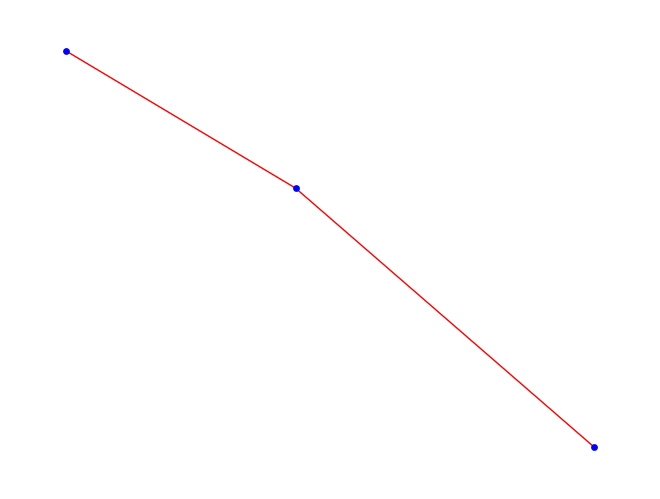

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a NumPy matrix 'adjacency_matrix' with shape (n, n)
adjacency_matrix = np.array([[0.0, 0.123, 0.0],
                             [0.123, 0.0, 0.456],
                             [0.0, 0.456, 0.0]])
np.fill_diagonal(adjacency_matrix, 0)
# Create a NetworkX graph from the modified adjacency matrix
graph = nx.from_numpy_matrix(adjacency_matrix)

# Assert the graph has 50 nodes
assert len(graph.nodes) == 3

# Draw the graph using matplotlib
pos = nx.spring_layout(graph)  # Positions of nodes for layout
nx.draw(graph, pos, with_labels=False, node_color='blue', node_size=15, edge_color='red')

# Show the plot
plt.show()


In [2]:
from pl_distill_tsp_model import *
from pl_meta_distill  import *


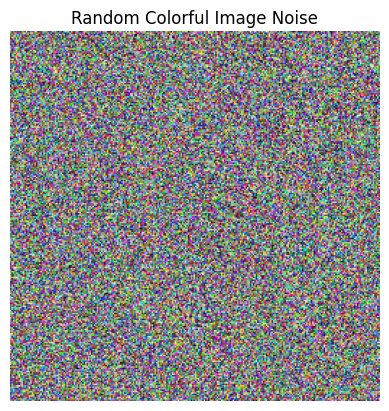

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility (optional)
np.random.seed(42)

# Define the dimensions of the image
width = 256
height = 256

# Generate random image noise
noise = np.random.random((height, width, 3))  # 3 for RGB channels

# Plot the random image noise
plt.imshow(noise)
plt.axis('off')
plt.title('Random Colorful Image Noise')
plt.show()

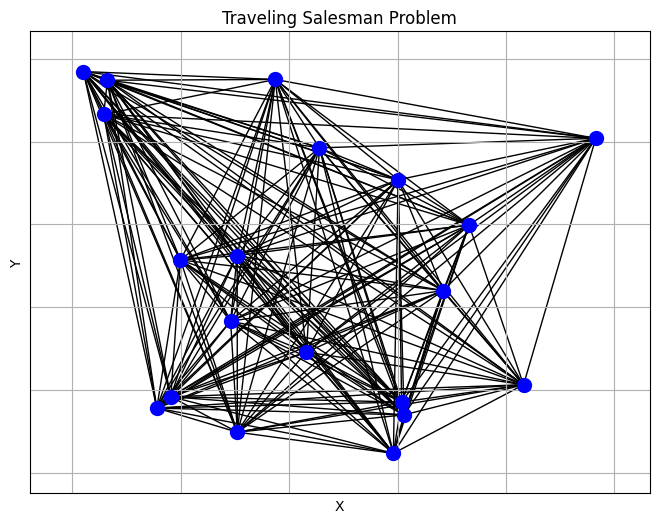

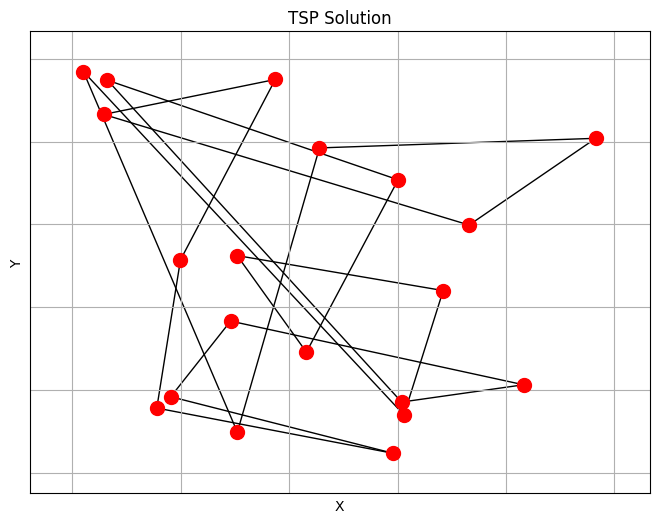

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pyconcorde.tsp as tsp_solver

# Generate random TSP coordinates
np.random.seed(42)
num_cities = 20
cities = np.random.rand(num_cities, 2)  # Random coordinates for cities

# Create a graph for TSP problem
tsp_graph = nx.Graph()
tsp_graph.add_nodes_from(range(num_cities))
pos = {i: (cities[i, 0], cities[i, 1]) for i in range(num_cities)}

# Add edges to the graph based on Euclidean distance
for i in range(num_cities):
    for j in range(i+1, num_cities):
        distance = np.linalg.norm(cities[i] - cities[j])
        tsp_graph.add_edge(i, j, weight=distance)

# Solve TSP using Concorde TSP solver
solver = tsp_solver.TSPSolver.from_data(cities[:, 0], cities[:, 1], norm="EUC_2D")
solution = solver.solve().tour

# Create a graph for the solution
solution_graph = nx.Graph()
solution_graph.add_nodes_from(range(num_cities))
solution_edges = [(solution[i], solution[i+1]) for i in range(num_cities-1)] + [(solution[-1], solution[0])]
solution_graph.add_edges_from(solution_edges)

# Plot the TSP problem
plt.figure(figsize=(8, 6))
nx.draw_networkx(tsp_graph, pos=pos, node_color='b', node_size=100, with_labels=False)
plt.title('Traveling Salesman Problem')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Plot the solution
plt.figure(figsize=(8, 6))
nx.draw_networkx(solution_graph, pos=pos, node_color='r', node_size=100, with_labels=False)
plt.title('TSP Solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'pyconcorde.tsp'

In [3]:
!git clone https://github.com/jvkersch/pyconcorde
!cd pyconcorde
!pip install matplotlib

fatal: destination path 'pyconcorde' already exists and is not an empty directory.
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.9 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached contourpy-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [6]:
!pip install e .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [7]:
!ls

co_datasets		 pl_meta_distill.py  __pycache__  visualize.ipynb
distill_train.py	 pl_meta_model.py    pyconcorde
models			 pl_mis_model.py     train.py
pl_distill_tsp_model.py  pl_tsp_model.py     utils


In [11]:
!cd pyconcorde; pip install -e .

Obtaining file:///usr0/home/junweih/DIFUSCO/difusco/pyconcorde
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Building editable for pyconcorde (pyproject.toml) ... done
  Created wheel for pyconcorde: filename=pyconcorde-0.1.0-0.editable-cp310-cp310-linux_x86_64.whl size=3570 sha256=06c9068d9659ba3fa1dafbcc0d956c06241085fbdd10b0db61a9ed19cfa83c79
  Stored in directory: /tmp/pip-ephem-wheel-cache-zjhvsc78/wheels/5c/e6/2c/e5e5edd6a99c7fe6c2ba3a1a0178f43ccfc58940b8c381e4b0
Successfully built pyconcorde


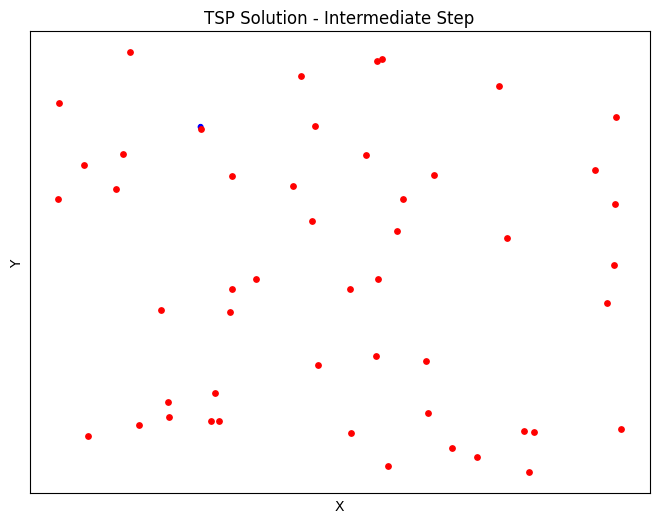

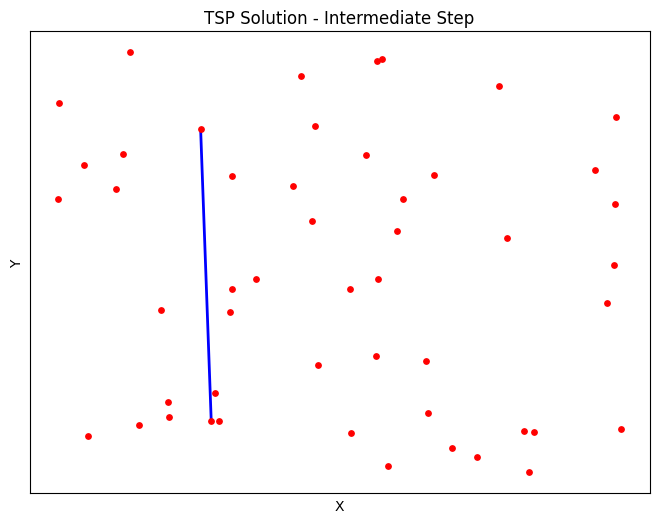

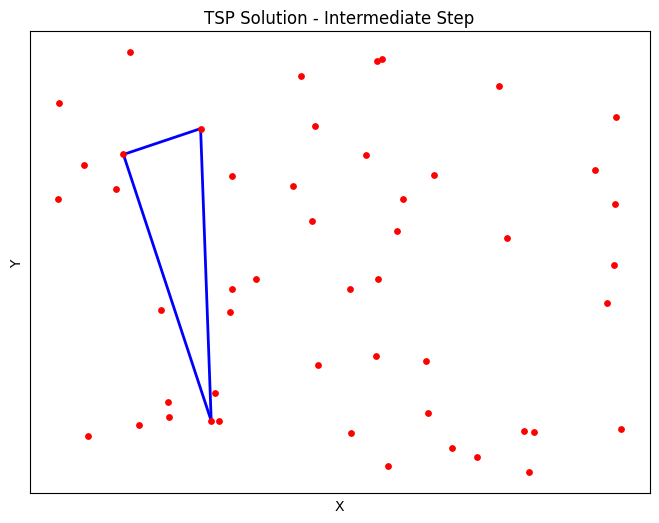

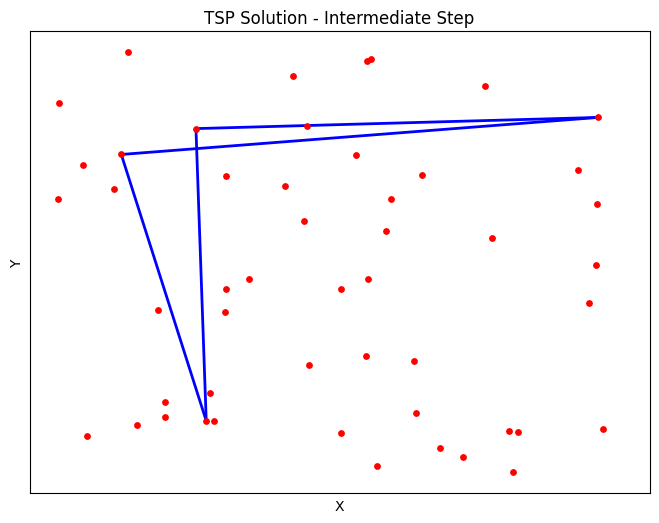

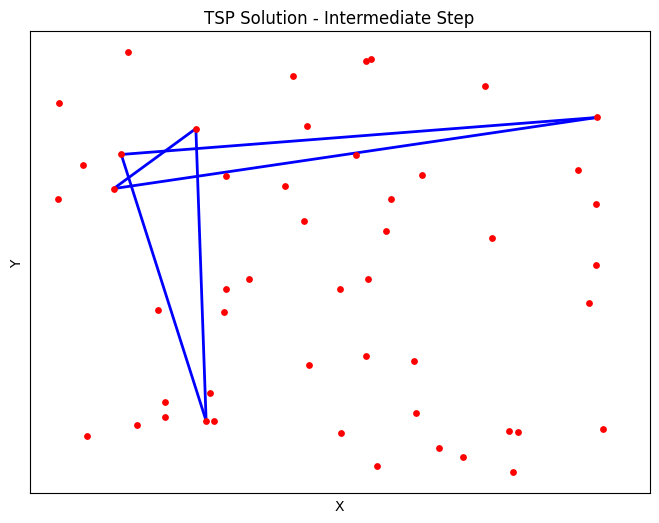

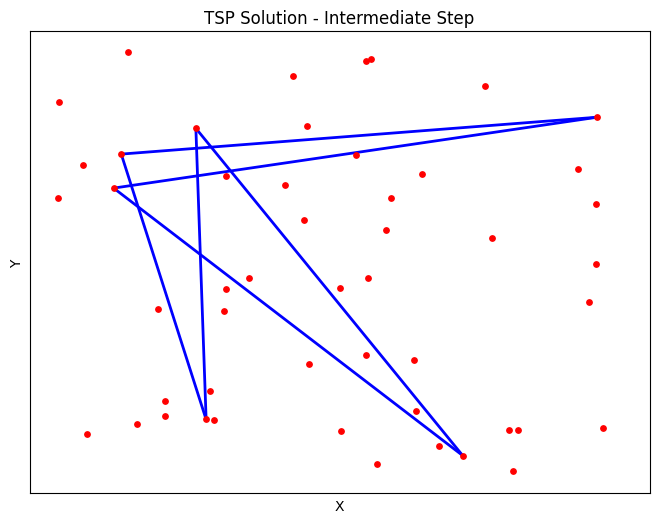

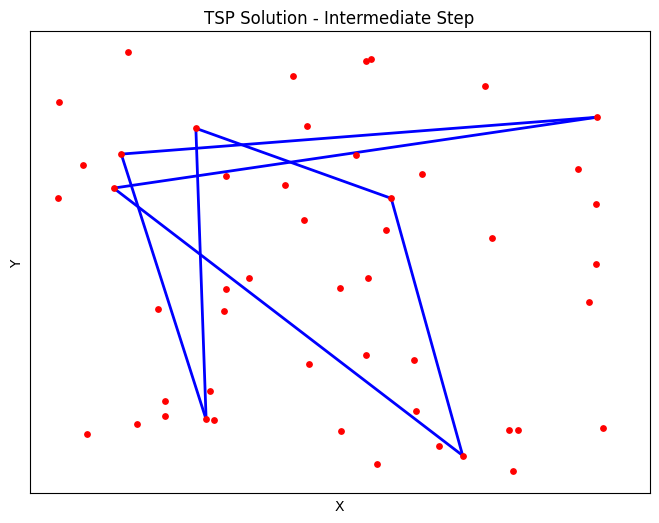

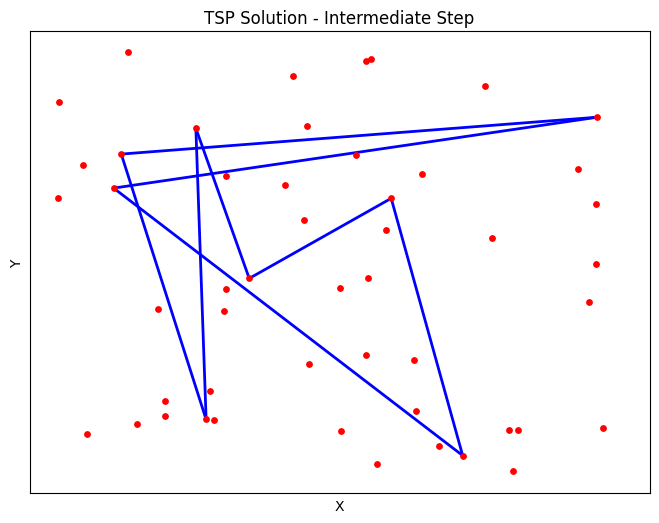

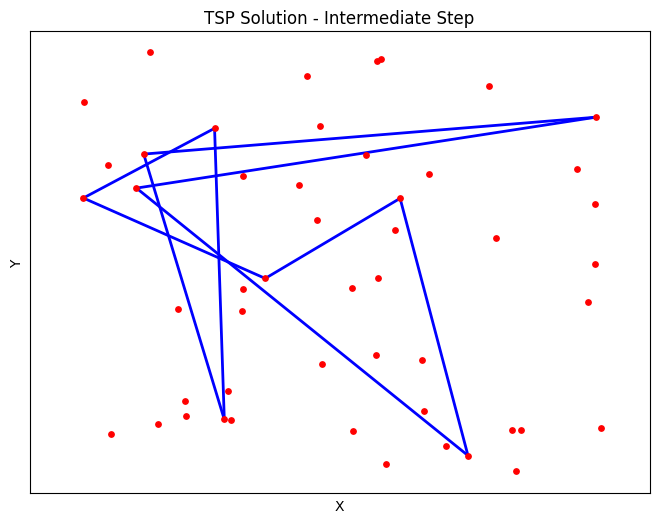

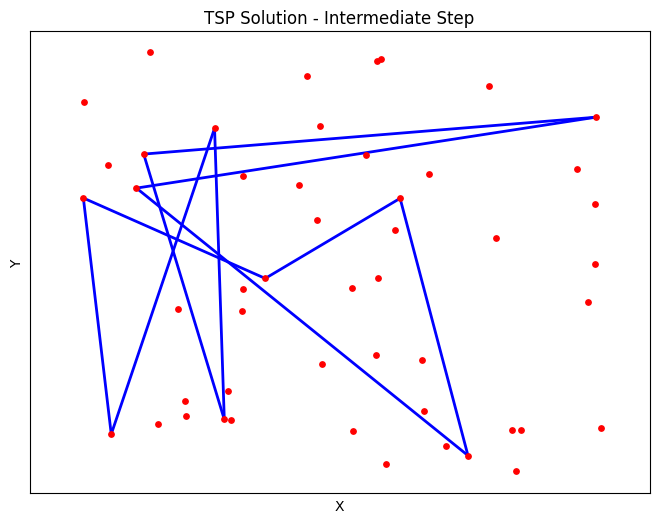

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_tsp(points, tour):
    G = nx.Graph()
    G.add_nodes_from(range(len(points)))
    for i in range(len(tour)-1):
        G.add_edge(tour[i], tour[i+1])
    G.add_edge(tour[-1], tour[0])

    plt.figure(figsize=(8, 6))
    nx.draw_networkx(G, pos=points, node_color='red', node_size=15, edge_color='blue', width=2, with_labels=False)
    plt.title("TSP Solution - Intermediate Step")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Example data points
np.random.seed(0)
points = np.random.rand(50, 2)

# Example tour (order of visiting the points)
tour = np.random.permutation(50)

# Generate intermediate steps and plot
for i in range(10):
    plot_tsp(points, tour[:i+1])


In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_tsp(points, tour):
    G = nx.Graph()
    G.add_nodes_from(range(len(points)))
    for i in range(len(tour)-1):
        G.add_edge(tour[i], tour[i+1])
    G.add_edge(tour[-1], tour[0])

    plt.figure(figsize=(8, 6))
    nx.draw_networkx(G, pos=points, node_color='red',node_size=15,  edge_color='blue', width=2, with_labels=False)
    plt.title("TSP Solution - Intermediate Step")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Example data points
np.random.seed(0)
points = np.random.rand(50, 2)

# Create a fully connected graph
G = nx.complete_graph(len(points))
graph = G
# Example tour (order of visiting the points)
pos = nx.spring_layout(graph)  # Positions of nodes for layout
nx.draw(graph, pos, with_labels=False, node_color='blue', node_size=15, edge_color='red')

# Show the plot
plt.show()
# Generate intermediate steps by gradually removing connections
# for i in range(len(tour) - 1):
#     G.remove_edge(tour[i], tour[i+1])
#     partial_tour = nx.algorithms.approximation.traveling_salesman_problem(G)
#     plot_tsp(points, partial_tour)


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

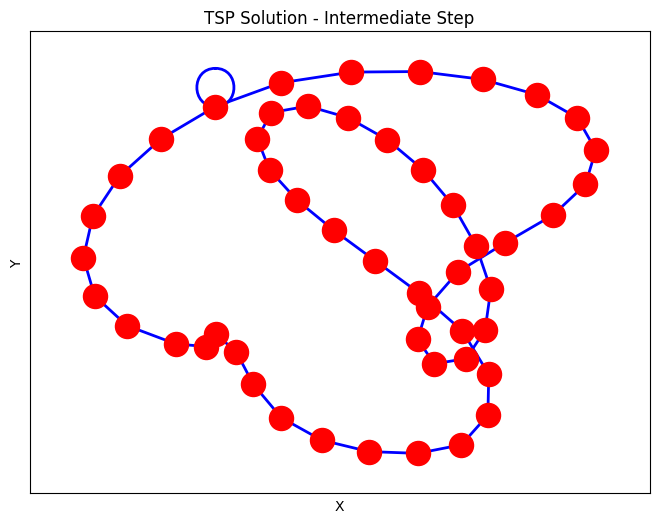

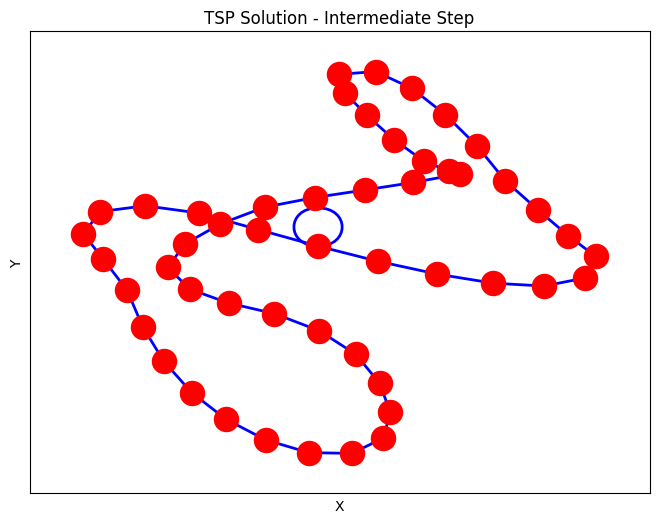

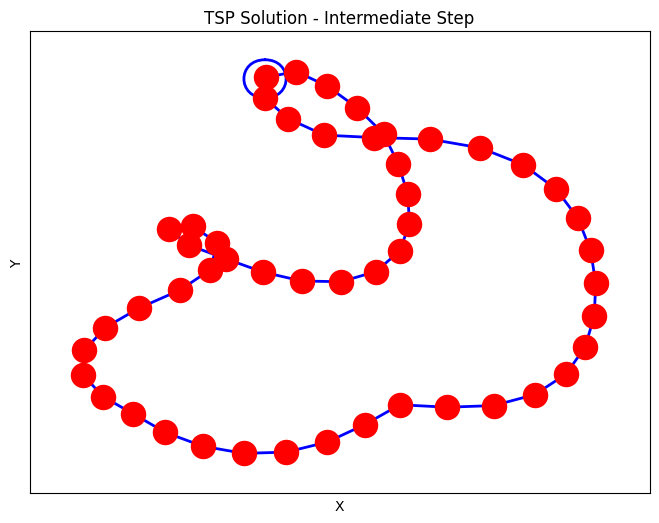

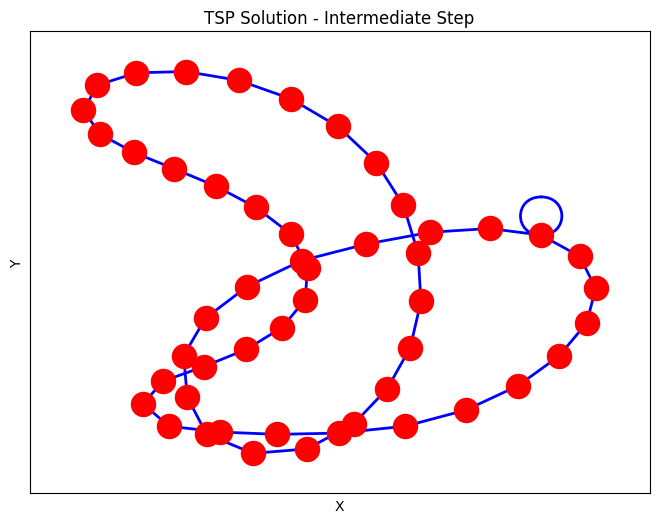

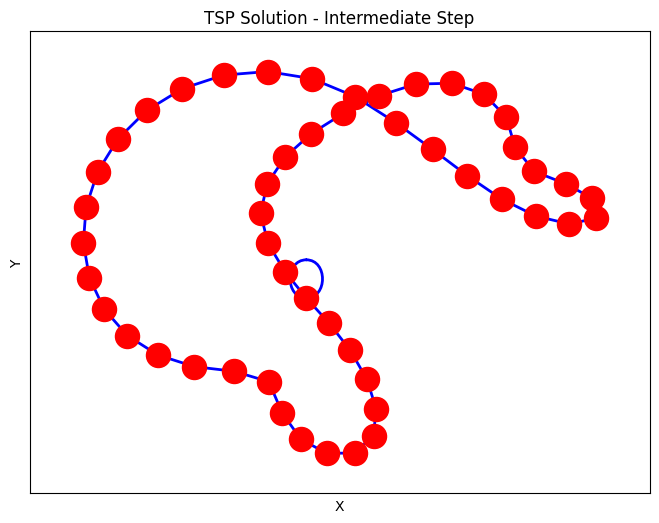

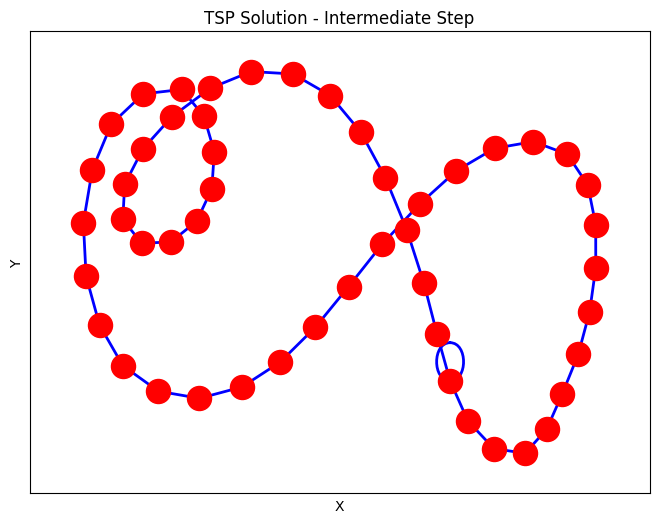

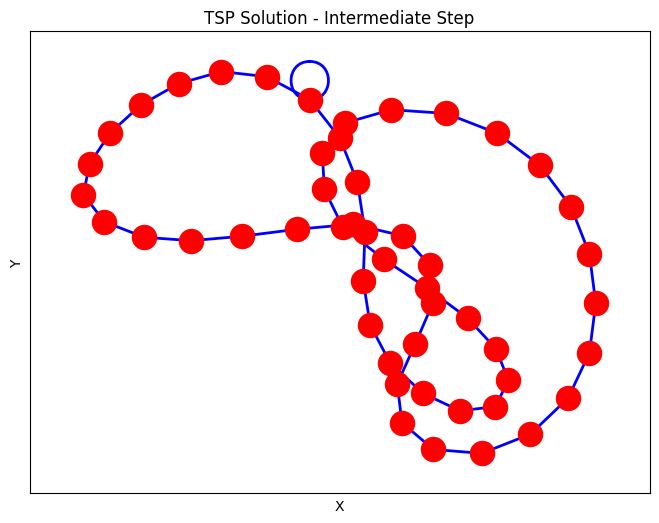

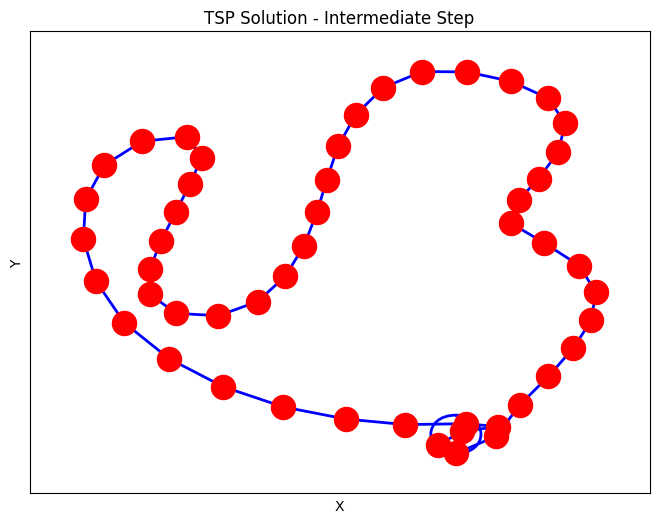

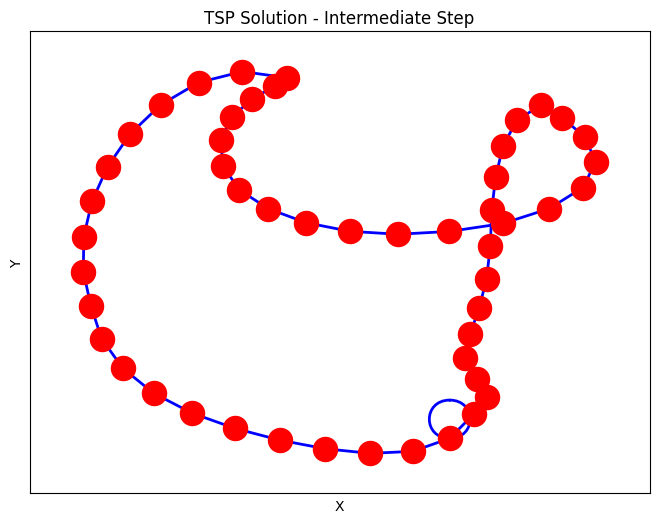

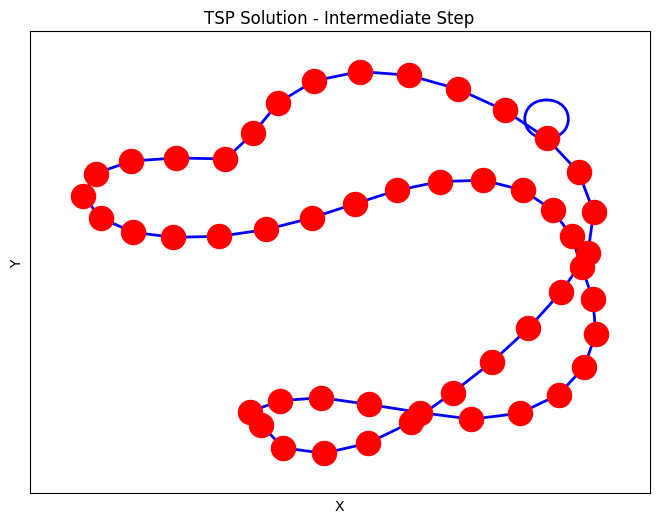

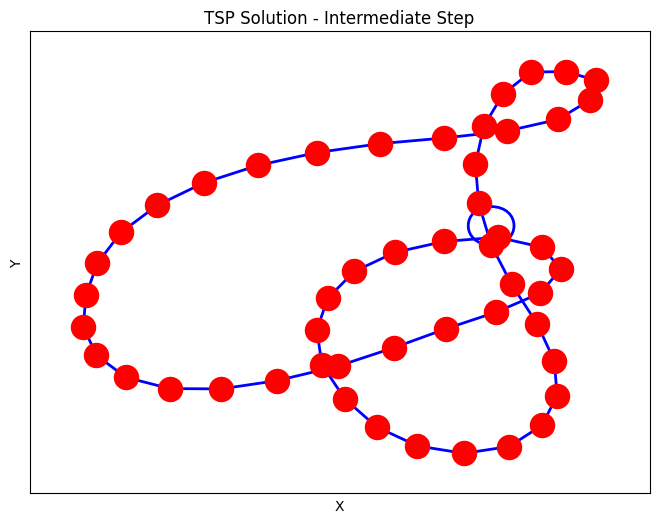

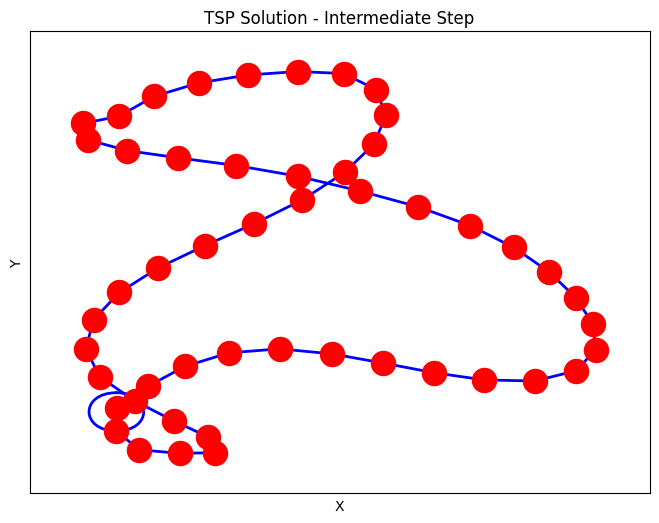

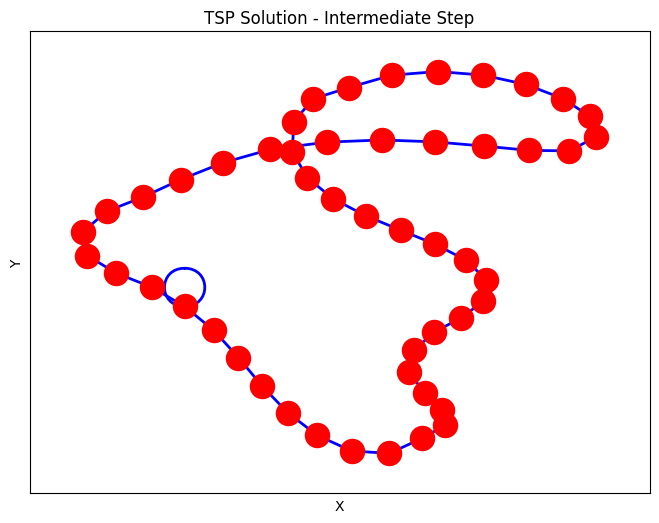

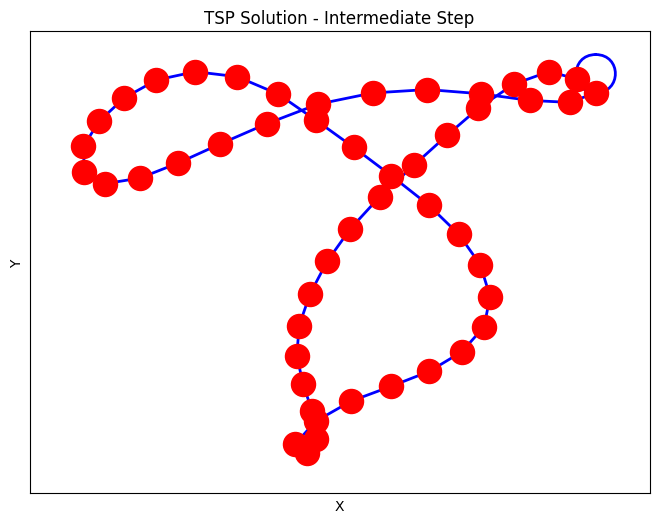

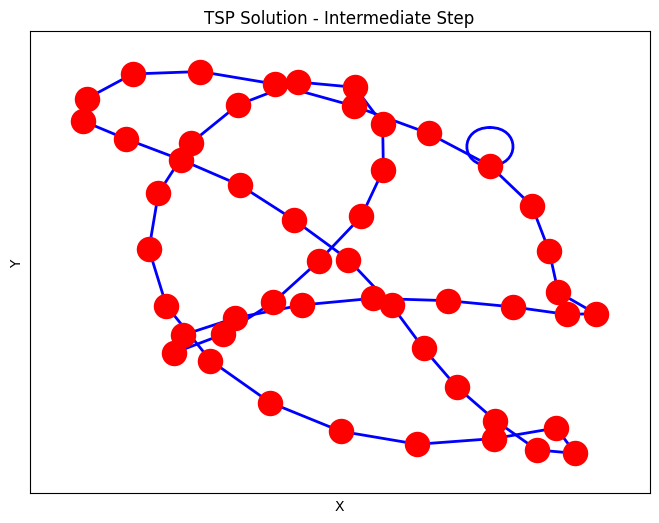

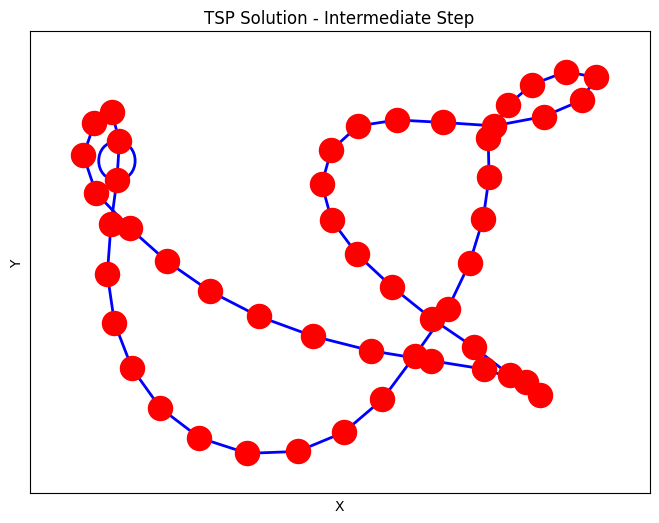

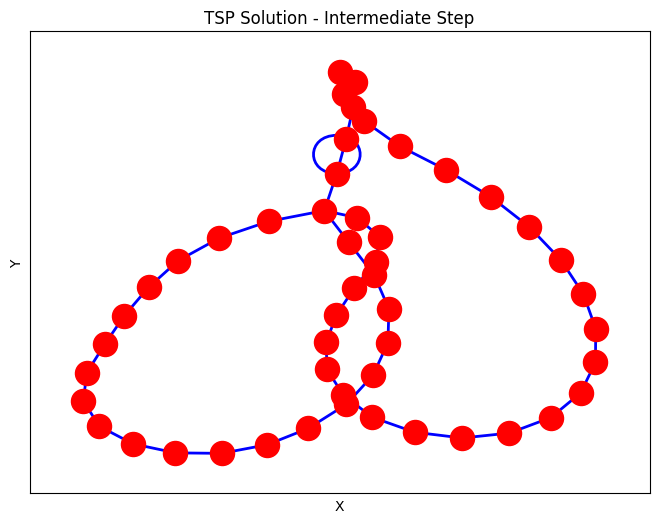

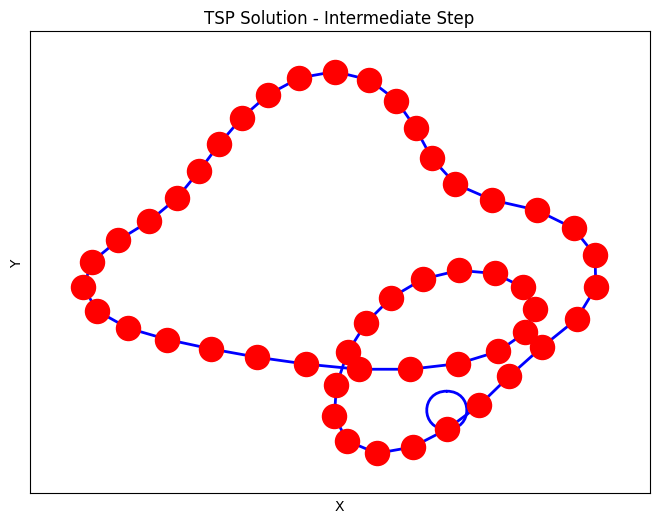

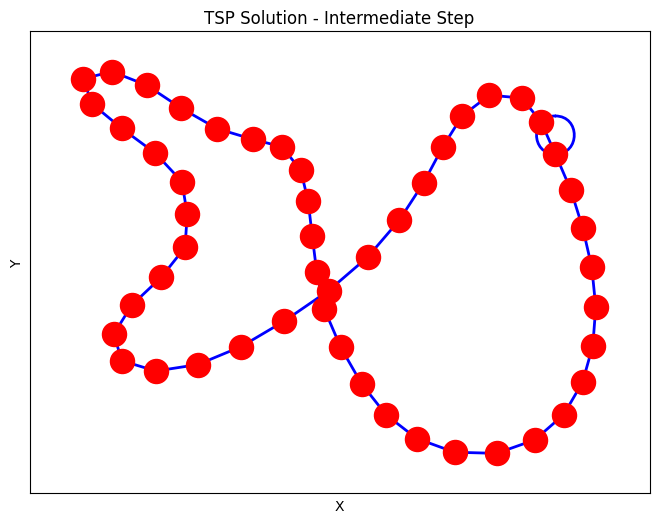

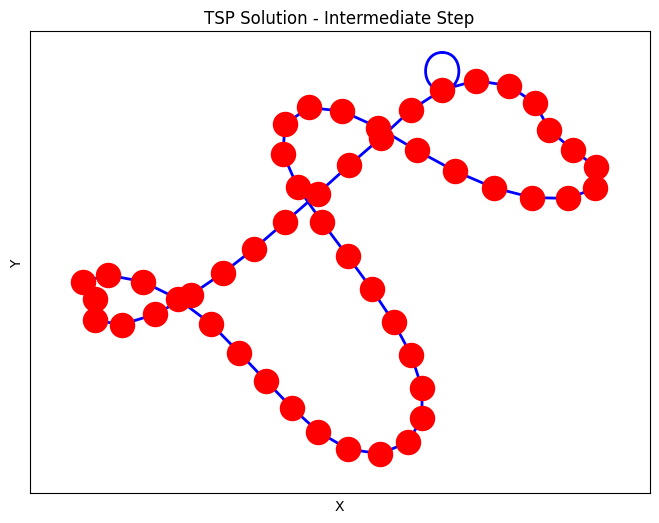

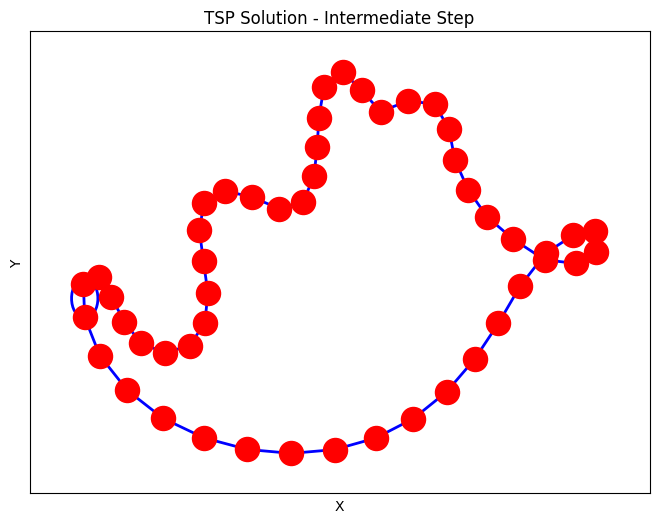

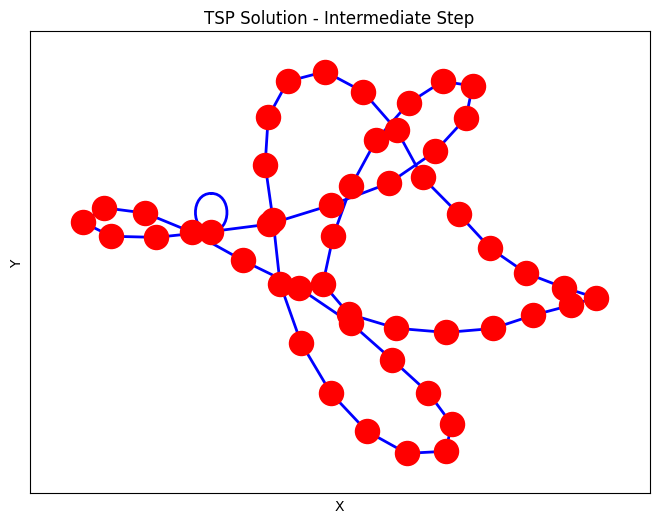

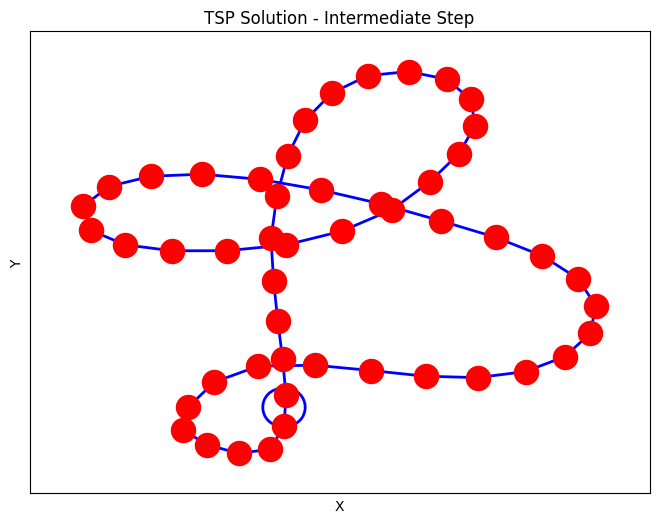

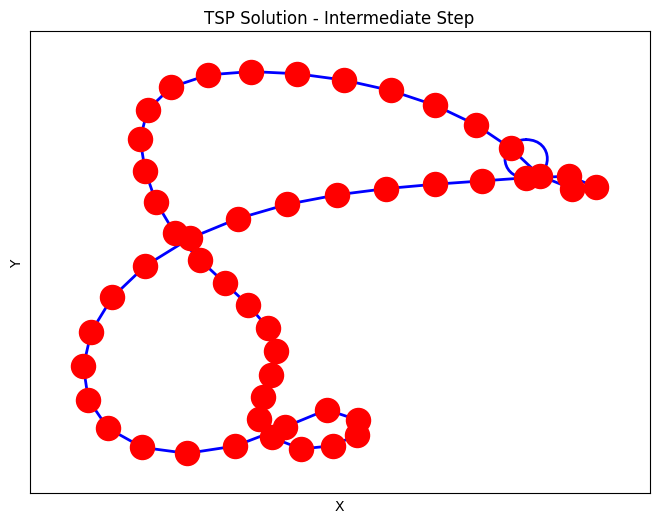

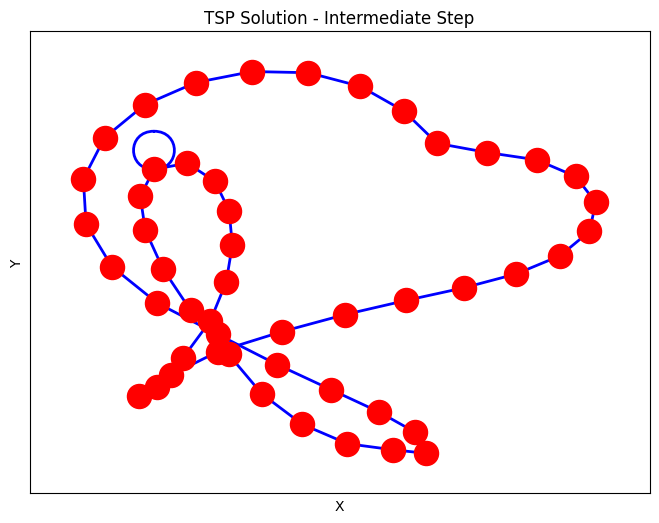

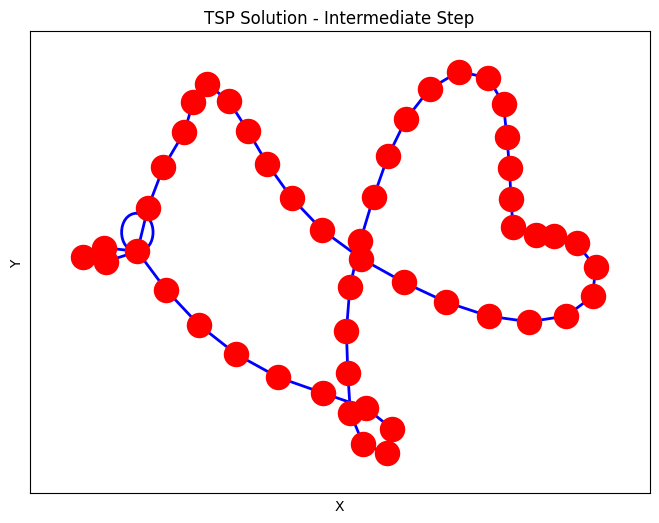

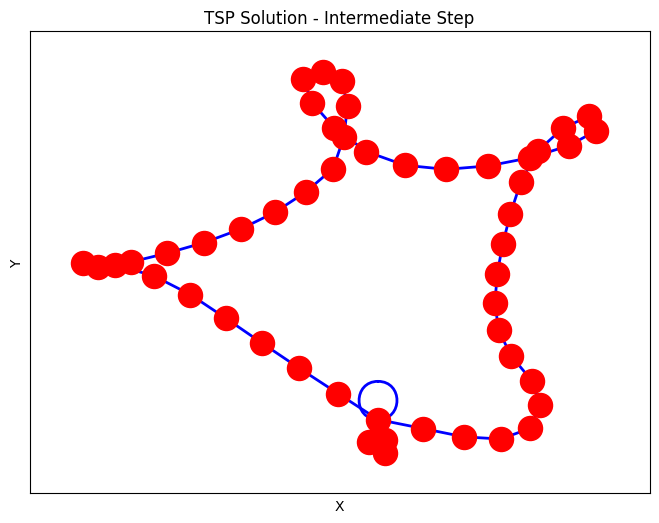

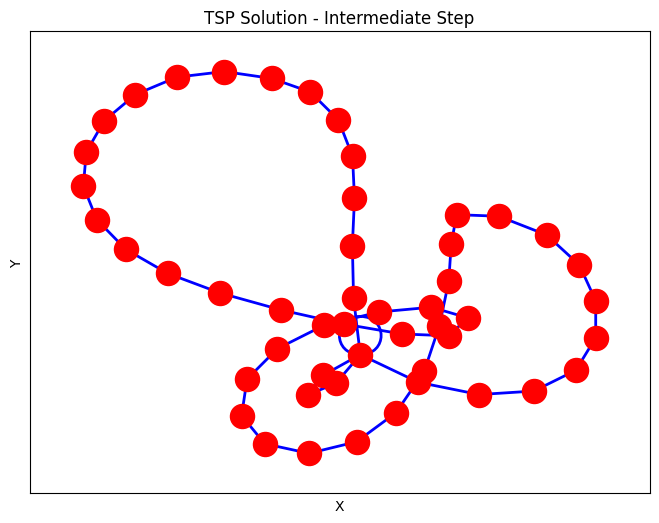

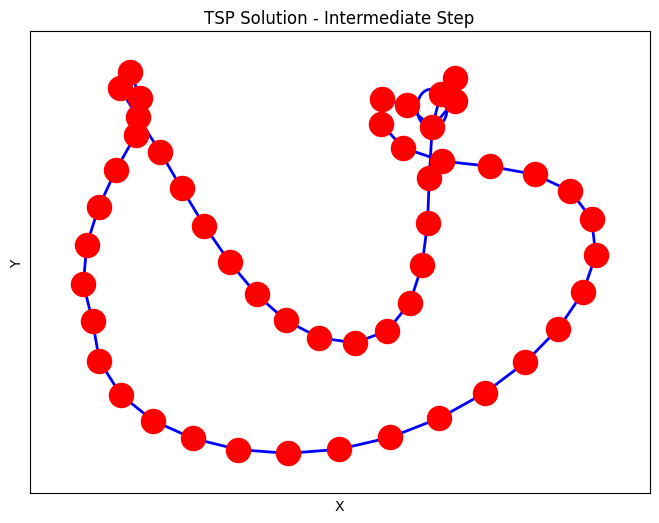

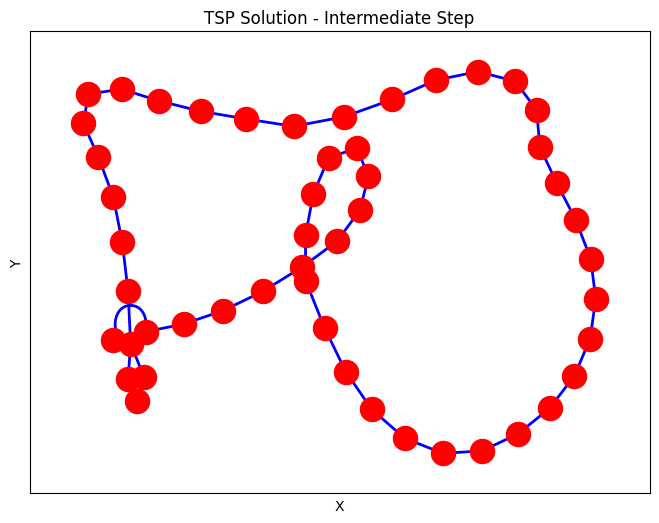

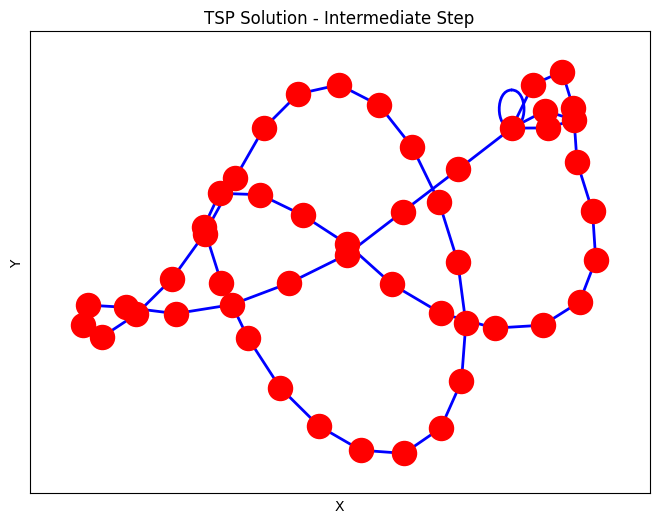

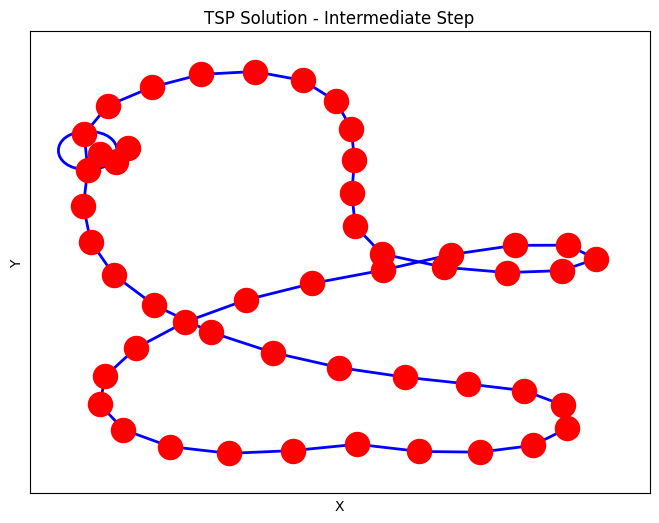

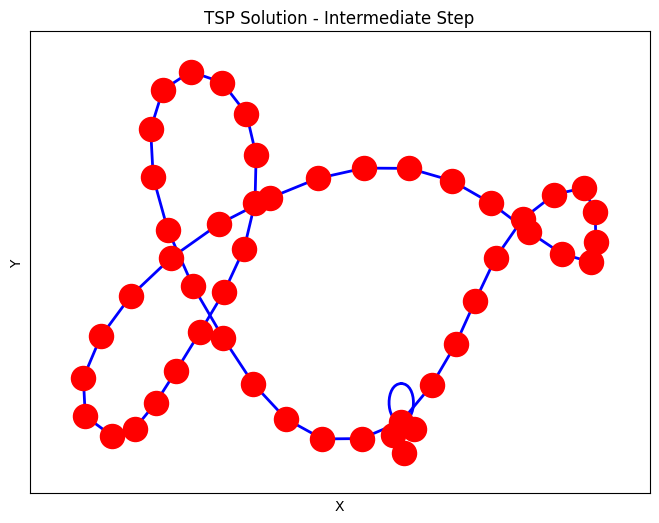

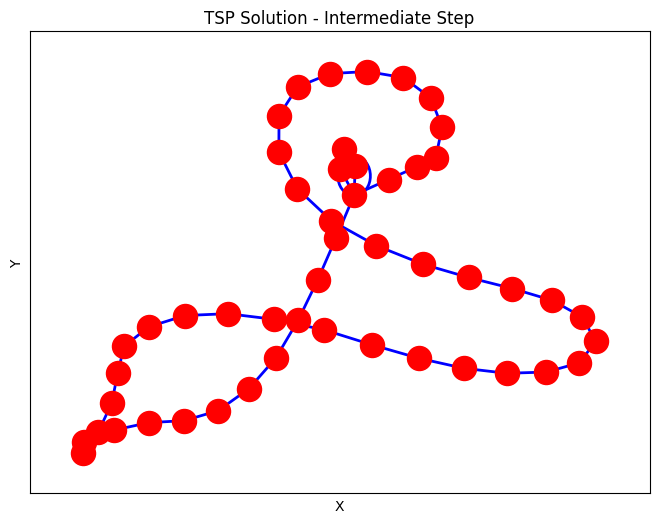

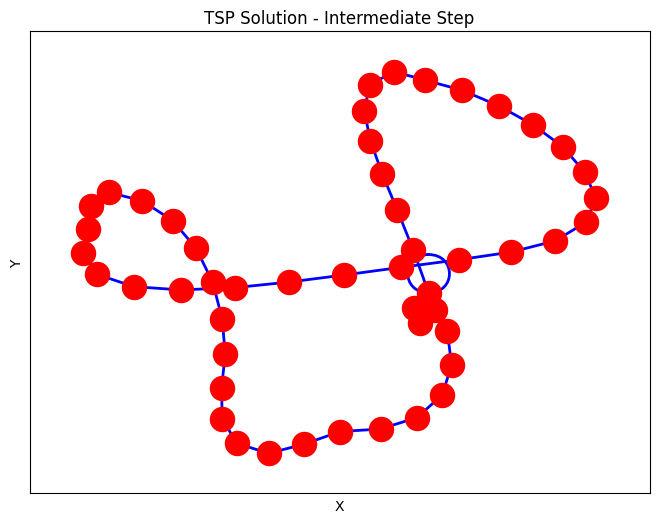

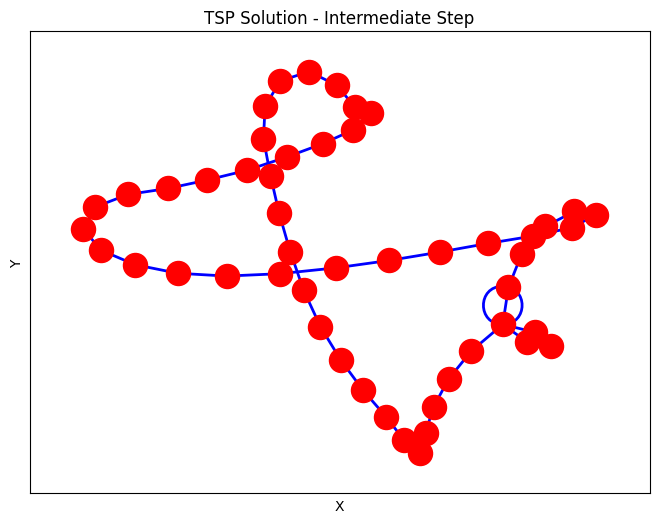

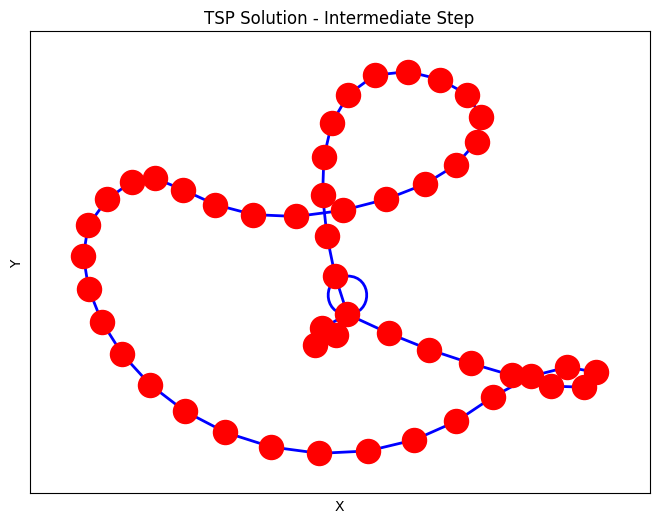

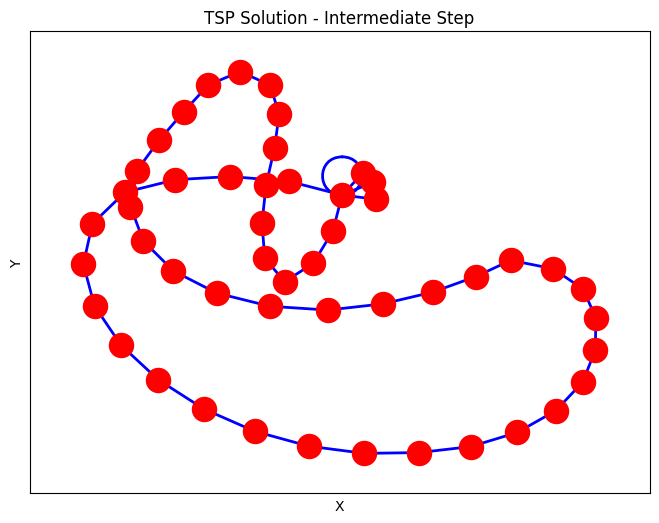

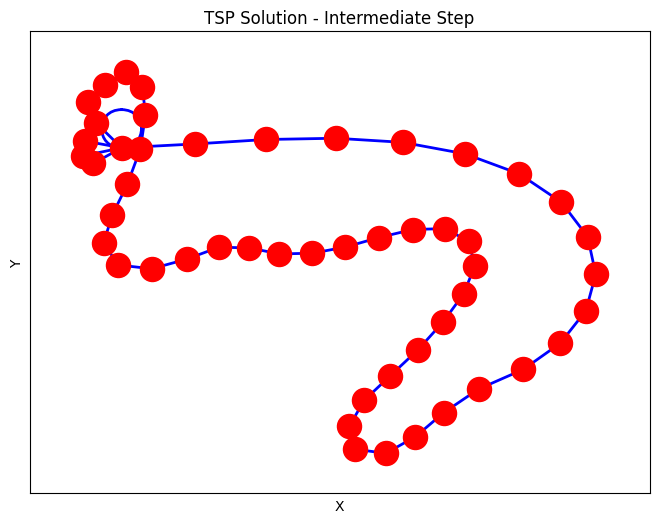

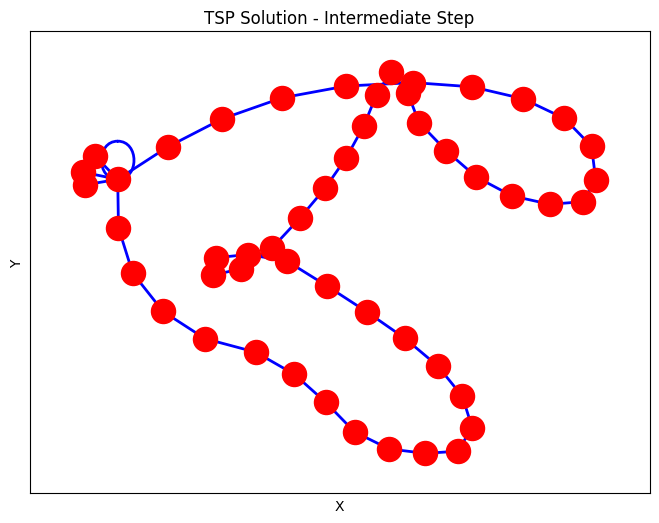

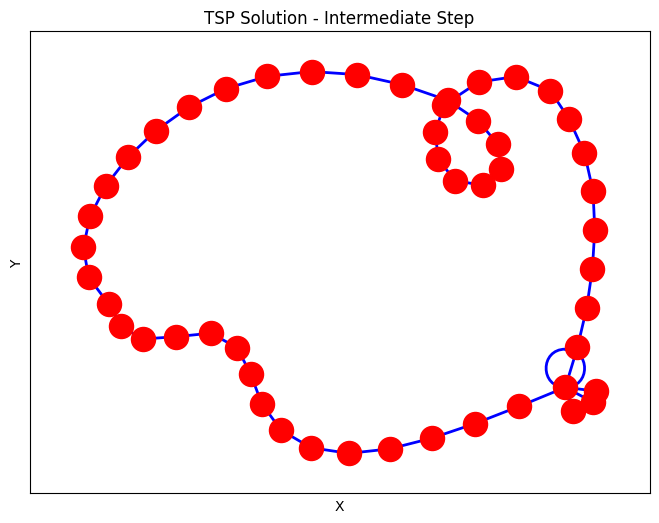

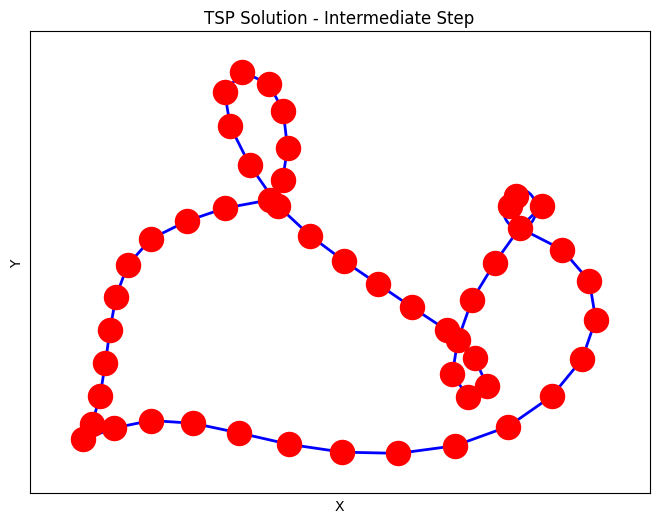

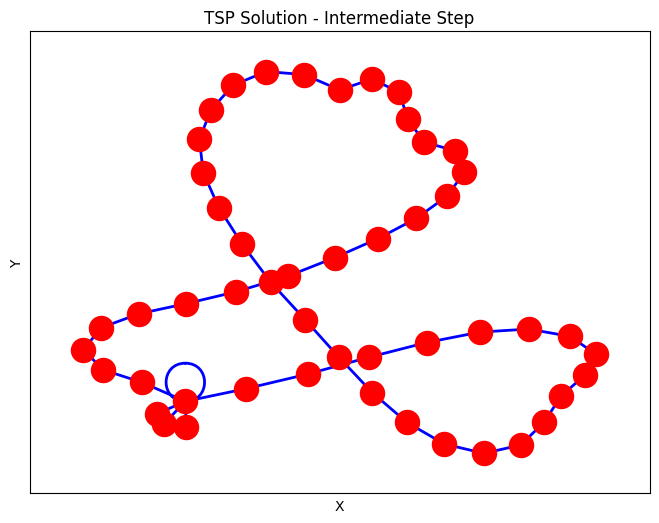

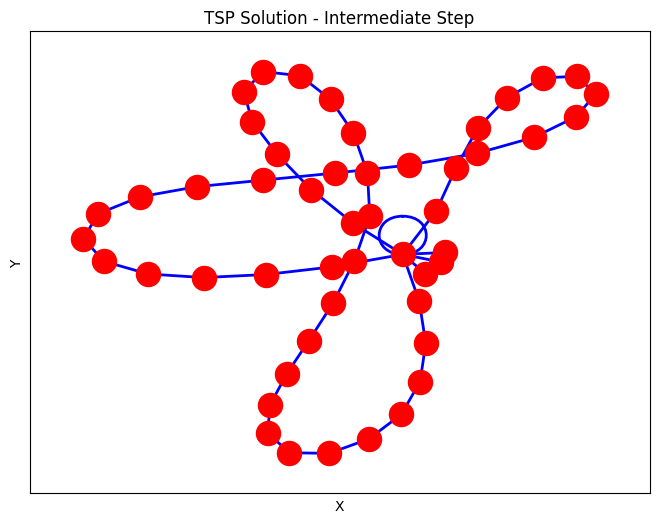

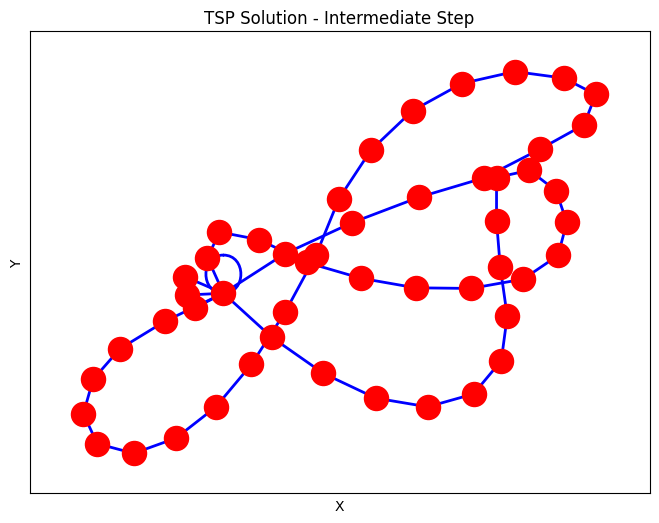

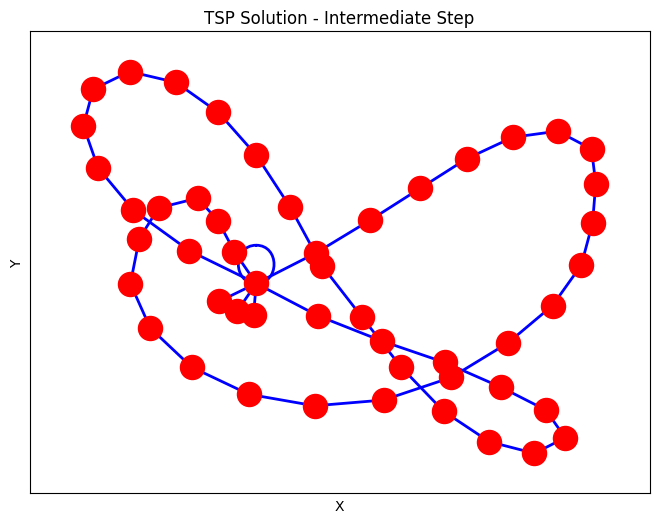

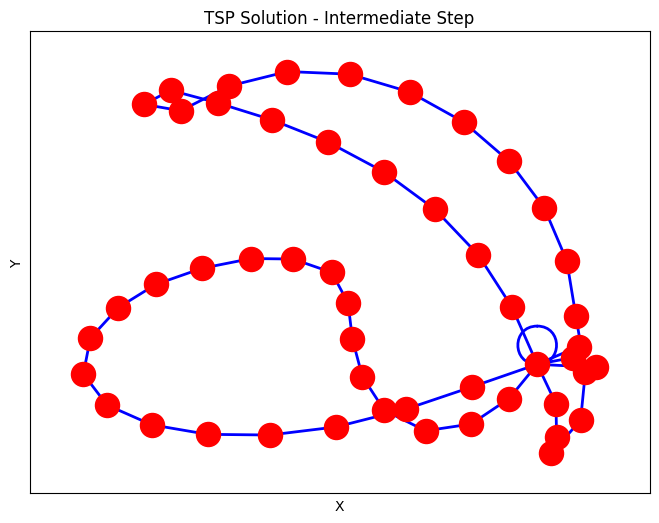

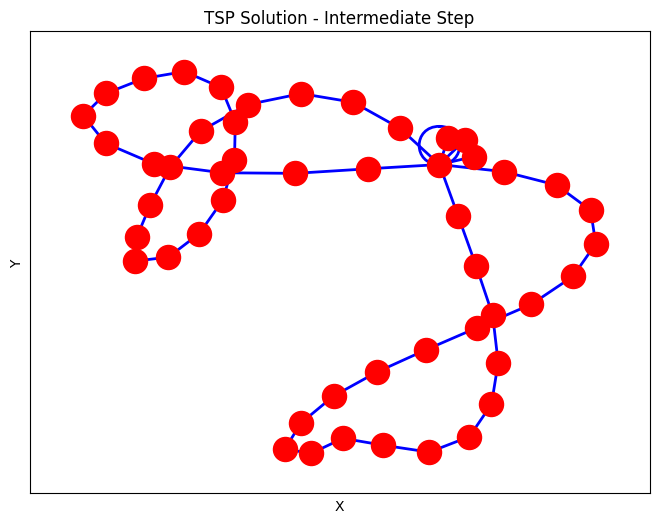

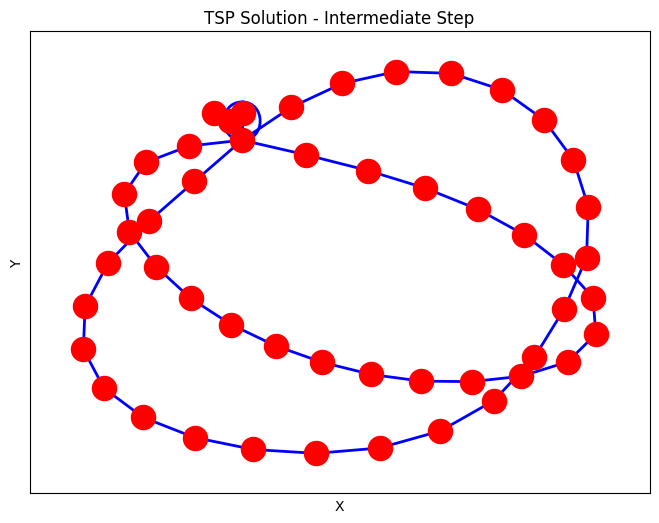

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_tsp(points, tour):
    G = nx.Graph()
    G.add_nodes_from(range(len(points)))
    for i in range(len(tour)-1):
        G.add_edge(tour[i], tour[i+1])
    G.add_edge(tour[-1], tour[0])

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos=pos, node_color='red', edge_color='blue', width=2, with_labels=False)
    plt.title("TSP Solution - Intermediate Step")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Example data points
np.random.seed(0)
points = np.random.rand(50, 2)

# Create a fully connected graph
G = nx.complete_graph(len(points))

# Example tour (order of visiting the points)
# tour = np.random.permutation(50)

# # Generate intermediate steps by gradually removing connections
# for i in range(len(tour) - 1):
#     G.remove_edge(tour[i], tour[i+1])
#     partial_tour = nx.algorithms.approximation.traveling_salesman_problem(G)
#     plot_tsp(points, partial_tour)


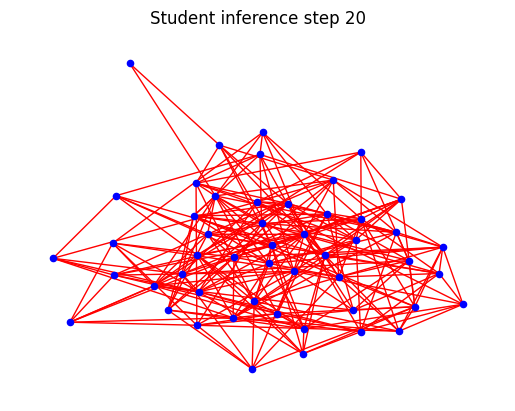

In [57]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a graph
G = nx.Graph()

# Add 50 nodes to the graph
num_nodes = 50
nodes = range(num_nodes)
G.add_nodes_from(nodes)

# Add random edges to create high density of connections
density = 0.2 # Adjust the density to control the number of connections
max_connections = int(num_nodes * (num_nodes - 1) / 2 * density)
num_connections = 0

while num_connections < max_connections:
    node1 = random.choice(nodes)
    node2 = random.choice(nodes)
    if node1 != node2 and not G.has_edge(node1, node2):
        G.add_edge(node1, node2)
        num_connections += 1

# Plot the graph
pos = nx.spring_layout(G)  # Positions of the nodes
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=False, node_color='blue',node_size=20, edge_color='red',ax=ax)

# Show the plot
ax.set_title("Student inference step 20")
plt.show()


In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a graph
G = nx.Graph()

# Add 50 nodes to the graph
num_nodes = 50
nodes = range(num_nodes)
G.add_nodes_from(nodes)

# Add random edges to create high density of connections
density = 0.4  # Adjust the density to control the number of connections
max_connections = int(num_nodes * (num_nodes - 1) / 2 * density)
num_connections = 0

while num_connections < max_connections:
    node1 = random.choice(nodes)
    node2 = random.choice(nodes)
    if node1 != node2 and not G.has_edge(node1, node2):
        G.add_edge(node1, node2)
        num_connections += 1

# Plot the graph
pos = nx.spring_layout(G)  # Positions of the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# Set the plot title
plt.title("Graph with High Density of Connections")

# Show the plot
plt.show()


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

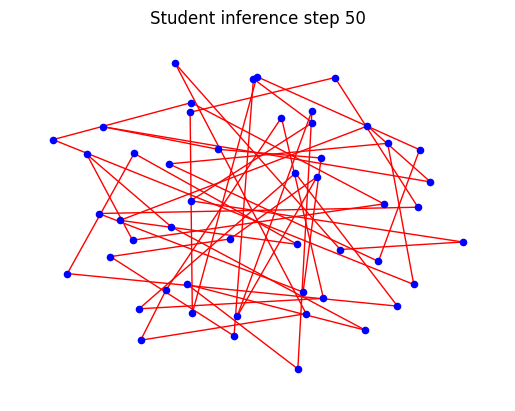

In [62]:
import matplotlib.pyplot as plt
import networkx as nx
import random
from networkx.algorithms.approximation import greedy_tsp
# Create a graph
G = nx.Graph()

# Add 50 nodes to the graph
complete_graph = nx.complete_graph(50)
for (u, v) in complete_graph.edges():
    weight = random.randint(1, 100)  # Generate a random weight between 1 and 100
    complete_graph[u][v]['weight'] = weight
tsp_solution = greedy_tsp(complete_graph)

# Extract the optimal TSP tour
optimal_tour = tsp_solution
tour_graph = nx.Graph()

# Add edges from the optimal tour to the tour graph
for i in range(len(optimal_tour) - 1):
    u = optimal_tour[i]
    v = optimal_tour[i + 1]
    tour_graph.add_edge(u, v)

# Plot the graph
pos = nx.spring_layout(complete_graph)  # Positions of the nodes
fig, ax = plt.subplots()
nx.draw(tour_graph, pos, with_labels=False, node_color='blue',node_size=20, edge_color='red', ax=ax)

# Set the plot title
ax.set_title("Student inference step 50")

# Show the plot
plt.show()


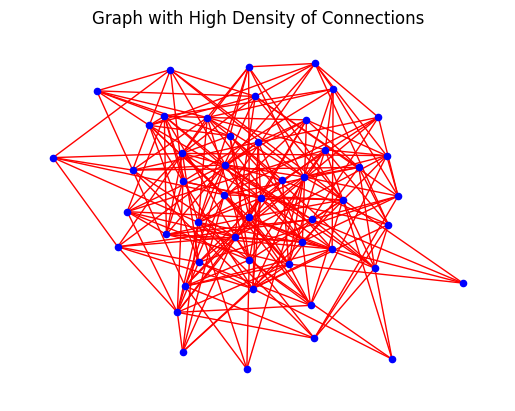

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a graph
G = nx.Graph()

# Add 50 nodes to the graph
num_nodes = 50
nodes = range(num_nodes)
G.add_nodes_from(nodes)

# Add random edges to create high density of connections
density = 0.2  # Adjust the density to control the number of connections
max_connections = int(num_nodes * (num_nodes - 1) / 2 * density)
num_connections = 0

while num_connections < max_connections:
    node1 = random.choice(nodes)
    node2 = random.choice(nodes)
    if node1 != node2 and not G.has_edge(node1, node2):
        G.add_edge(node1, node2)
        num_connections += 1

# Plot the graph
pos = nx.spring_layout(G)  # Positions of the nodes
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=False, node_color='blue',node_size=20, edge_color='red', ax=ax)

# Set the plot title
ax.set_title("Graph with High Density of Connections")

# Show the plot
plt.show()


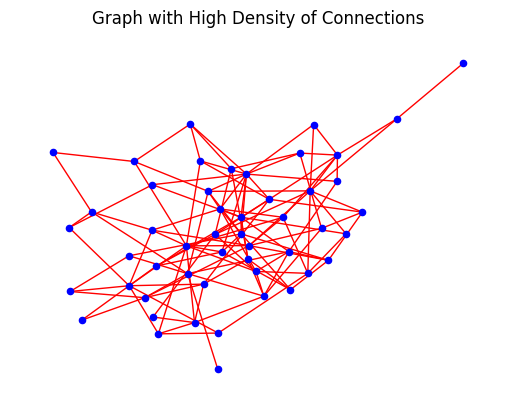

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a graph
G = nx.Graph()

# Add 50 nodes to the graph
num_nodes = 50
nodes = range(num_nodes)
G.add_nodes_from(nodes)

# Add random edges to create high density of connections
density = 0.1  # Adjust the density to control the number of connections
max_connections = int(num_nodes * (num_nodes - 1) / 2 * density)
num_connections = 0

while num_connections < max_connections:
    node1 = random.choice(nodes)
    node2 = random.choice(nodes)
    if node1 != node2 and not G.has_edge(node1, node2):
        G.add_edge(node1, node2)
        num_connections += 1

# Plot the graph
pos = nx.spring_layout(G)  # Positions of the nodes
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=False, node_color='blue',node_size=20, edge_color='red', ax=ax)

# Set the plot title
ax.set_title("Graph with High Density of Connections")

# Show the plot
plt.show()


In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a complete graph
num_nodes = 50
G = nx.complete_graph(num_nodes)

# Remove 15% of the connections randomly in each iteration
num_connections = int(num_nodes * (num_nodes - 1) / 2)
connections_to_remove = int(0.15 * num_connections)

# Plot the initial graph
pos = nx.spring_layout(G)  # Positions of the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Initial Graph")
plt.show(block=True)

# Iterate and remove edges
for i in range(connections_to_remove):
    # Remove a random edge
    removed_edge = random.choice(list(G.edges()))
    G.remove_edge(*removed_edge)

    # Plot the updated graph
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(f"Graph after Removing {i+1} Edges")
    plt.show(block=True)


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a complete graph
num_nodes = 50
G = nx.complete_graph(num_nodes)

# Remove 15% of the connections randomly in each iteration
num_connections = int(num_nodes * (num_nodes - 1) / 2)
connections_to_remove = int(0.15 * num_connections)

# Plot the initial graph
pos = nx.spring_layout(G)  # Positions of the nodes
fig = plt.figure()
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Initial Graph")
fig.savefig("initial_graph.png")
plt.close(fig)

i = 1
# Iterate and remove edges
while(len(G.edges())) > 0:
    # Remove a random edge
    j = int(len(list(G.edges()))*0.15) if len(list(G.edges())) > 0 else 1
    removed_edge = random.sample(list(G.edges()),j)
    for edge in removed_edge:
         G.remove_edge(*edge)
    i += 1
    

    # Plot the updated graph
    fig, ax = plt.subplots()
    nx.draw(G, pos, node_color='blue',node_size=20, edge_color='red', ax=ax)
    # nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(f"Graph after {i * 20} Steps")
    fig.savefig(f"graph_{i+1}.png")
    plt.close(fig)


KeyboardInterrupt: 

In [22]:
!pip uninstall matplotlib -y


Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Successfully uninstalled matplotlib-3.7.1


In [24]:
!pip install matplotlib==3.5.1 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 69.0 MB/s eta 0:00:0000:010:01
